In [368]:
import pandas as pd
import numpy as np

col_names = ['tempmax','tempmin','temp','dew','humidity','preciptype','visibility','uvindex','sealevelpressure']

data = pd.read_csv("data.csv", usecols=col_names)
##replace unknown preciptype with 0's: not neccisary 
data['preciptype'] = data['preciptype'].replace(np.nan, 0)
data

,tempmax,tempmin,temp,dew,humidity,preciptype,sealevelpressure,visibility,uvindex
0,28.9,10.0,19.1,5.1,43.1,0,1018.2,15.8,8
1,35.0,15.5,24.5,5.7,33.6,0,1015.1,15.6,8
2,35.0,15.6,25.2,4.8,28.4,0,1015.8,15.3,8
3,37.8,17.1,27.3,3.8,24.9,0,1015.1,15.1,8
4,37.8,18.7,28.1,3.2,21.7,0,1014.9,13.2,7
...,...,...,...,...,...,...,...,...,...
736,39.9,21.0,29.1,4.2,22.9,rain,1013.2,15.4,9
737,28.8,18.4,23.7,0.3,27.4,0,1013.5,15.6,9
738,25.0,8.4,17.1,-3.5,27.2,0,1013.3,9.0,8
739,28.8,12.8,19.8,-2.4,23.4,0,1015.7,11.2,8


In [369]:
## Need to create label so I will make new column based if preciptype is rain or empty
data["label"] = data['preciptype'].map(lambda x: 1 if "rain"==x else 0)
data


,tempmax,tempmin,temp,dew,humidity,preciptype,sealevelpressure,visibility,uvindex,label
0,28.9,10.0,19.1,5.1,43.1,0,1018.2,15.8,8,0
1,35.0,15.5,24.5,5.7,33.6,0,1015.1,15.6,8,0
2,35.0,15.6,25.2,4.8,28.4,0,1015.8,15.3,8,0
3,37.8,17.1,27.3,3.8,24.9,0,1015.1,15.1,8,0
4,37.8,18.7,28.1,3.2,21.7,0,1014.9,13.2,7,0
...,...,...,...,...,...,...,...,...,...,...
736,39.9,21.0,29.1,4.2,22.9,rain,1013.2,15.4,9,1
737,28.8,18.4,23.7,0.3,27.4,0,1013.5,15.6,9,0
738,25.0,8.4,17.1,-3.5,27.2,0,1013.3,9.0,8,0
739,28.8,12.8,19.8,-2.4,23.4,0,1015.7,11.2,8,0


In [370]:
##This maps if it rains every day, since all the data is in order from oldest to newest at the bottom,
##If we shift all the values up one, it will allow our model to see that if it rained the next day and not the current day
data['label'] = data['label'].shift(-1)
## Since the last row of data is now useless since we shifted all the data up one, we will remove it
data.drop([740], axis=0, inplace=True)

data.head(25)

,tempmax,tempmin,temp,dew,humidity,preciptype,sealevelpressure,visibility,uvindex,label
0,28.9,10.0,19.1,5.1,43.1,0,1018.2,15.8,8,0.0
1,35.0,15.5,24.5,5.7,33.6,0,1015.1,15.6,8,0.0
2,35.0,15.6,25.2,4.8,28.4,0,1015.8,15.3,8,0.0
3,37.8,17.1,27.3,3.8,24.9,0,1015.1,15.1,8,0.0
4,37.8,18.7,28.1,3.2,21.7,0,1014.9,13.2,7,0.0
5,33.3,16.5,24.9,1.2,25.0,0,1017.7,10.8,8,0.0
6,31.1,14.9,21.7,-0.5,23.1,0,1011.7,15.0,8,0.0
7,20.6,8.8,14.7,-5.9,24.8,0,1021.5,15.9,8,0.0
8,25.0,8.3,16.4,-6.9,22.6,0,1020.4,15.6,8,0.0
9,28.8,9.9,19.4,-4.8,21.3,0,1018.8,14.9,8,0.0


In [371]:
##I will now drop the perciptype so the model does not recognize it as a reliable indicator
data.drop(["preciptype"],axis=1,inplace=True)

In [372]:
feature_cols = ['tempmax','tempmin','temp','dew','visibility','uvindex','sealevelpressure']
X = data[feature_cols] # Features
y = data.label # Target variable

In [373]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)


In [374]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [375]:
X_test


,tempmax,tempmin,temp,dew,visibility,uvindex,sealevelpressure
196,12.8,0.7,5.8,-2.8,16.0,8,1013.3
187,13.3,1.0,6.2,-2.3,16.0,7,1018.6
14,29.3,13.7,21.4,0.5,7.8,6,1017.4
31,28.4,11.0,18.9,2.6,12.1,6,1019.6
682,37.1,22.7,30.2,4.2,16.0,10,1010.5
...,...,...,...,...,...,...,...
587,6.7,0.0,2.9,-2.0,15.3,7,1000.1
382,28.4,16.6,20.9,-0.5,16.0,7,1007.8
35,27.8,11.6,18.5,0.8,15.2,6,1018.8
584,22.2,7.8,13.9,-0.8,15.9,6,1017.2


In [376]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8324324324324325


In [377]:
##testing it wont rain
#  [tempmax,tempmin,temp,dew,visibility,uvindex,sealevelpressure]
new_day =  [[110, 80, 98, 5, 16.0, 8,1010.4,]]
prediction = logreg.predict(new_day)
prediction[0] # 1.0 for "yes, it will rain the next day", 0.0 for "no"

0.0

In [378]:
##testing it will rain
#  [tempmax,tempmin,temp,dew,visibility,uvindex,sealevelpressure]
new_day =  [[30.6,13,21.6,3.5,1013.4,6.3,7]]
prediction = logreg.predict(new_day)
prediction[0] # 1.0 for "yes, it will rain the next day", 0.0 for "no"

1.0

## Homework 5 start

In [413]:
# Testing ROCAUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.5612693757855047

In [414]:
## This is not a very good roc auc score, meaning half of its posotives are false posotives
# and half of its negatives are false negatives
# Attempted dropping each feature to see how big of a difference it made, not much (see pdf for stats)
# Dropping Each feature:
#default: 0.83
#tempMap: 0.83
#tempMin: 0.84
#temp: 0.84
#dew: 0.83
#visibility: 0.82
#uvindex: 0.83
#sealeveloressure:0.83
# So removing any features did not help much with my accuracy score. Not goint to continue with that.

# Going to try and add rain data from portland.

In [381]:
col_names = ['preciptype']

data_portland = pd.read_csv("data-portland.csv", usecols=col_names)
##replace unknown preciptype with 0's: not neccisary 
data_portland['preciptype'] = data_portland['preciptype'].replace(np.nan, 0)
## Need to create label so I will make new column based if preciptype is rain or empty
data_portland["portland_rain"] = data_portland['preciptype'].map(lambda x: 1 if "rain"==x else 0)
## There is 741 rows, because we shifted the data before, we wont shift this one because we want it to
## be a feature and not a label, so we still have to drop the last row like before.
data_portland['portland_rain'] = data_portland['portland_rain'].shift(-1)
data_portland.drop([740], axis=0, inplace=True)
data_portland

,preciptype,portland_rain
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
735,0,0.0
736,0,0.0
737,0,0.0
738,0,0.0


In [383]:
data = data.join(data_portland["portland_rain"])
data.head(100)

,tempmax,tempmin,temp,dew,humidity,sealevelpressure,visibility,uvindex,label,portland_rain
0,28.9,10.0,19.1,5.1,43.1,1018.2,15.8,8,0.0,0.0
1,35.0,15.5,24.5,5.7,33.6,1015.1,15.6,8,0.0,0.0
2,35.0,15.6,25.2,4.8,28.4,1015.8,15.3,8,0.0,0.0
3,37.8,17.1,27.3,3.8,24.9,1015.1,15.1,8,0.0,0.0
4,37.8,18.7,28.1,3.2,21.7,1014.9,13.2,7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,4.9,-5.8,-1.6,-8.2,63.3,1032.2,15.9,4,0.0,1.0
96,4.3,-6.6,-2.2,-6.7,72.7,1031.8,15.0,4,0.0,0.0
97,7.1,-4.5,-0.4,-6.0,67.6,1036.5,15.8,4,0.0,1.0
98,6.1,-6.2,-0.6,-6.0,69.1,1033.2,15.9,4,0.0,1.0


In [384]:
# going to retrain the data but using 
feature_cols = ['tempmax','tempmin','temp','dew','visibility','uvindex','sealevelpressure','portland_rain']
X = data[feature_cols] # Features
y = data.label # Target variable
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)
# import the class
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)
# fit the model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8486486486486486


In [385]:
# Oh year easy 1% increase :) going to try and use k-fold validation to tran the model better

In [386]:
from sklearn.model_selection import KFold
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 82.57%


In [173]:
## Ahh well that is not too good, we will stick to normal accuracy to protect my brain.

In [391]:
## I was thinking that if I was able to feed the model more data that could help it increase,
## but the source I got my data from does not allow queries that far back sadly.

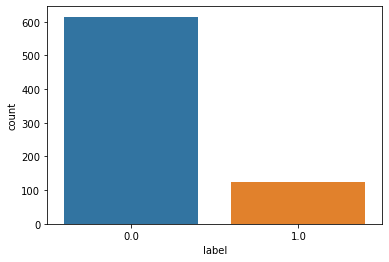

In [393]:
import seaborn as sns
ax = sns.countplot(x="label", data=data) # Without vs with Diabetes

In [403]:
## ahh so that is not a good distribution lets do k-fold
## going to test all training methods to see if it will increase accuyracy
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [418]:
# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 84.68%


In [407]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 82.57%


In [408]:
skfold = StratifiedKFold(n_splits=3)
model_skfold = LogisticRegression(max_iter=1000)
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 82.84%


In [409]:
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression(max_iter=1000)
results_loocv = model_selection.cross_val_score(model_loocv, X, y, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

Accuracy: 82.30%


In [412]:
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression(max_iter=1000)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 81.35% (1.91%)


In [416]:
## so does not look great there, other training methods seems to show a lower accuracy which I think means my normal
## training method is getting a lucky and high accuracy score
## So sofar we have made a 1.6 percent increase
## I will write a paper for this.
print(0.8486486486486486 - 0.8324324324324325)


0.01621621621621616
